In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Reading the Rawdata
The Rawdata is extracted from the Excelfile to create a Dataframe


In [ ]:
# Die Rohdaten wird hier eingelesen
df = pd.read_excel(r"C:\Users\liwas\OneDrive\Desktop\Hochschule München\MBB8\Applied ML\Projektarbeit\chiefs_knife_dataset.xlsx")
df["Ra"]

0       0.16
1       0.16
2       0.16
3       0.16
4       0.16
        ... 
8505    0.14
8506    0.14
8507    0.14
8508    0.14
8509    0.14
Name: Ra, Length: 8510, dtype: float64

In [ ]:
list(df.columns.values)

['Number',
 'Name',
 'Linie',
 'Ra_ganz',
 'Rq_ganz',
 'Rz_ganz',
 'Rt_ganz',
 'Ra_Messlinienlange',
 'Rq_Messlinienlange',
 'Rz_Messlinienlange',
 'Rt_Messlinienlange',
 'Ra_ohneRand',
 'Rq_ohneRand',
 'Rz_ohneRand',
 'Rt_ohneRand',
 'Original_Linienanzahl',
 'Original_MW_Linienbreite',
 'Original_ST_Linienbreite',
 'Original_Max',
 'Original_Min',
 'Original_Bereich',
 'Sobel_Linienanzahl',
 'Sobel_MW_Linienbreite',
 'Sobel_ST_Linienbreite',
 'Sobel_Max',
 'Sobel_Min',
 'Sobel_Bereich',
 'Sobel_kont_Linienanzahl',
 'Sobel_kont_MW_Linienbreite',
 'Sobel_kont_ST_Linienbreite',
 'Sobel_kont_Max',
 'Sobel_kont_Min',
 'Sobel_kont_Bereich',
 'DFT_Median_Linienanzahl',
 'DFT_Median_MW_Linienbreite',
 'DFT_Median_ST_Linienbreite',
 'DFT_Median_Max',
 'DFT_Median_Min',
 'DFT_Median_Bereich',
 'DFT_Median_sobel_Linienanzahl',
 'DFT_Median_sobel_MW_Linienbreite',
 'DFT_Median_sobel_ST_Linienbreite',
 'DFT_Median_sobel_Max',
 'DFT_Median_sobel_Min',
 'DFT_Median_sobel_Bereich',
 'Ra',
 'Rz',
 'R

# Targetvalue
For this Projectworkpart, the Ra Values are regarded as the Targetvalue for the Supervised Learningpart. For this Part, we are going to solve a Classificationproblem. For that Reason the Target Values is going to be classified into 3 Classes depending on the Ra Values.

In [ ]:
Y = df['Ra']

ind_0 = np.where(Y < 0.13)
ind_1 = np.where((Y >= 0.13) & (Y <= 0.21))
ind_2 = np.where(Y > 0.21)

Y_class = Y.copy()
Y_class[ind_0] = 0
Y_class[ind_1] = 1
Y_class[ind_2] = 2

display(Y_class)

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
8505    1.0
8506    1.0
8507    1.0
8508    1.0
8509    1.0
Name: Ra, Length: 8510, dtype: float64

# Random Variable
We are going use a randomly generated Variable to filter out the Variables who have little to no effect on the Output of the Model. 

In [ ]:
df = df.iloc[:, 2:-17]
df = df.drop(columns="Linie")


#Random Variable 
df["Random_Variable"] = np.random.rand(len(df),1) * 100


Daten Splits in Training und Test Daten

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, Y_class, test_size=0.2, random_state=42)

# Model Intialization
We will initialize the Model and train it with the Training Data which has been split.

In [ ]:
rfc = RandomForestClassifier(random_state= 42)
rfc.fit(X_train , y_train)

RandomForestClassifier(random_state=42)

The next Step is to use the trained Model to predict the Output based on the Testdata

In [ ]:
y_pred = rfc.predict(X_test)
list(y_pred)

[0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 2.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 2.0,
 1.0,
 2.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 2.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 2.0,
 0.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 2.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 2.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 0.0,
 1.0,
 1.0,
 2.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 2.0,
 2.0,
 2.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 0.0,
 0.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 2.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0

# Feature Importance

We can access the Feature Importance Values of the Model and are going to use this to sort the Features based on its Importance. This helps us find which Features have the most Influence on the Result of the Outcomes.

Feature: Ra_ganz and the Importance : 0.045072445311418075 
Feature: Rq_ganz and the Importance : 0.04202229468962928 
Feature: Rz_ganz and the Importance : 0.03206311128237958 
Feature: Rt_ganz and the Importance : 0.026308422836875407 
Feature: Ra_Messlinienlange and the Importance : 0.034259476584668526 
Feature: Rq_Messlinienlange and the Importance : 0.032851395841448944 
Feature: Rz_Messlinienlange and the Importance : 0.03099268169733219 
Feature: Rt_Messlinienlange and the Importance : 0.024217749297505014 
Feature: Ra_ohneRand and the Importance : 0.04129073885528476 
Feature: Rq_ohneRand and the Importance : 0.03409918152601143 
Feature: Rz_ohneRand and the Importance : 0.030834653992762313 
Feature: Rt_ohneRand and the Importance : 0.024301191102934484 
Feature: Original_Linienanzahl and the Importance : 0.07162786486976216 
Feature: Original_MW_Linienbreite and the Importance : 0.05173637651311495 
Feature: Original_ST_Linienbreite and the Importance : 0.04239818307665029 


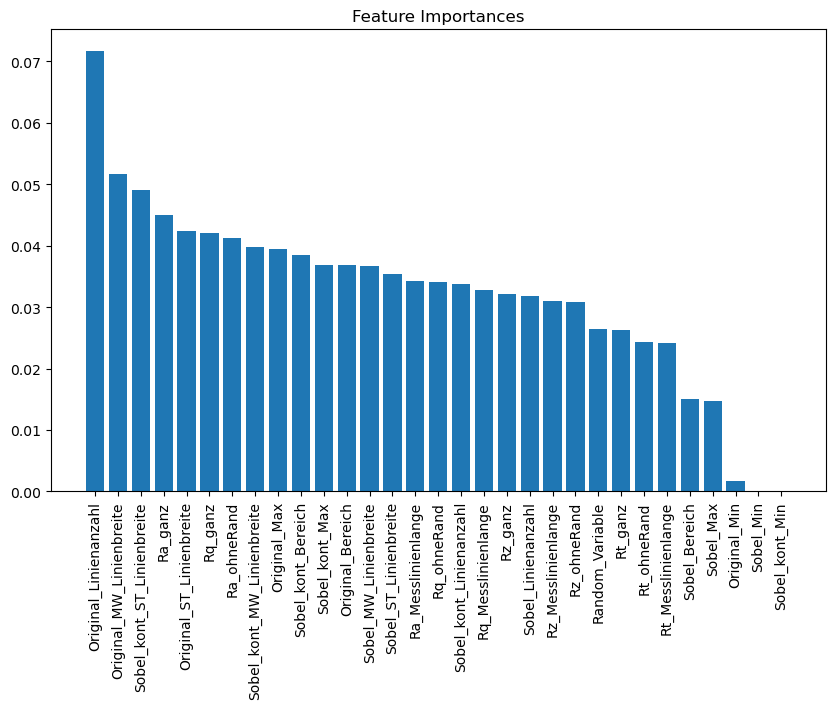

In [ ]:
# Feature Importance

feature_importance = rfc.feature_importances_
for feature,importance in zip(X_train.columns , feature_importance):
     # Feature with its Importances
     print(f"Feature: {feature} and the Importance : {importance} ")

# Sorting the features
sorted_indices = feature_importance.argsort()[::-1] # sorted in decreasing order
sorted_importances = feature_importance[sorted_indices]

#Create a Bar Plot of the feature Importances
plt.figure(figsize = (10,6))
plt.bar(range(X_train.shape[1]) , sorted_importances)
plt.xticks( range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.title("Feature Importances")
plt.show()

# Confusion Matrix
With the help of the Confusion Matrix we can observe the Accuracy of the Model. The Values along the Diagonal are correctly predicted whereas the ones not along are predicted incorrectly.


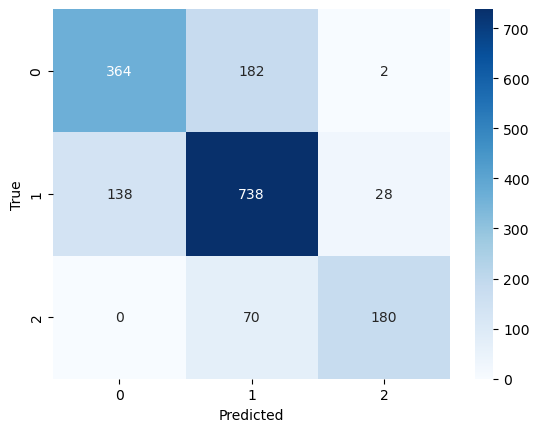

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Filtering with Randomvariable
As it was mentioned before we can use a randomly generated Variable to filter out the Features which have little to no Influence on the Outcome of the Model. We then train the Random Forest Model with filtered Dataset to see if any changes occur on the Outcome.

In [ ]:
Ind = np.where(feature_importance < feature_importance[-1])
Colname = df.columns[Ind]

df1 = df.drop(columns=Colname) 
df1 = df1.drop(columns= "Random_Variable")
y_pred = rfc.predict(X_test)

X_train, X_test, y_train, y_test = train_test_split(df1, Y_class, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(random_state= 42)
rfc.fit(X_train , y_train)


RandomForestClassifier(random_state=42)

Feature: Ra_ganz and the Importance : 0.05275639023789311 
Feature: Rq_ganz and the Importance : 0.05193062992059521 
Feature: Rz_ganz and the Importance : 0.04077723341315613 
Feature: Ra_Messlinienlange and the Importance : 0.039772272494221744 
Feature: Rq_Messlinienlange and the Importance : 0.038548369067851175 
Feature: Rz_Messlinienlange and the Importance : 0.03411103380008993 
Feature: Ra_ohneRand and the Importance : 0.04248710820119087 
Feature: Rq_ohneRand and the Importance : 0.04241805105382735 
Feature: Rz_ohneRand and the Importance : 0.038810744152093776 
Feature: Original_Linienanzahl and the Importance : 0.07933984776473968 
Feature: Original_MW_Linienbreite and the Importance : 0.054902558093946625 
Feature: Original_ST_Linienbreite and the Importance : 0.048149903225640764 
Feature: Original_Max and the Importance : 0.045096805685709646 
Feature: Original_Bereich and the Importance : 0.04126108616953308 
Feature: Sobel_Linienanzahl and the Importance : 0.0347676991

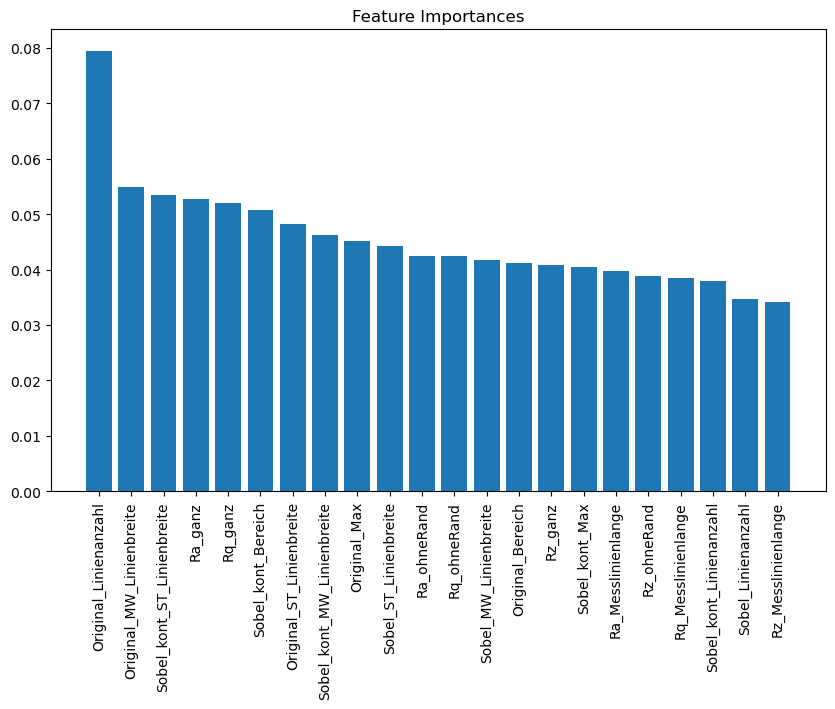

In [ ]:
feature_importance = rfc.feature_importances_
for feature,importance in zip(X_train.columns , feature_importance):
     # Feature with its Importances
     print(f"Feature: {feature} and the Importance : {importance} ")

# Sorting the features
sorted_indices = feature_importance.argsort()[::-1] # sorted in decreasing order
sorted_importances = feature_importance[sorted_indices]

#Create a Bar Plot of the feature Importances
plt.figure(figsize = (10,6))
plt.bar(range(X_train.shape[1]) , sorted_importances)
plt.xticks( range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.title("Feature Importances")
plt.show()

As observed below on the Confusion Matrix, we can observe see that no changes on the Outcome of the Model.

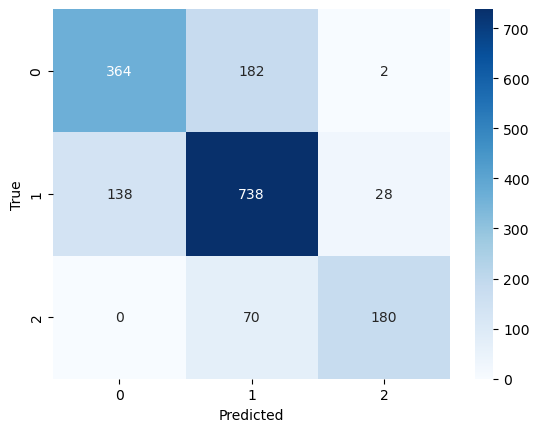

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Hyperparameter Optimization

To improve the Results, we are going to undergo Hyperparameter Optimization. This means that a selected amount of Hyperparameters are going to optimized with the help of Algorithms which specializes on this. We are going to use for this Part the GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[1000, 2500, 5000, 7500, 10000], 'max_depth':[30,35,45,50]}
clf = GridSearchCV(rfc, parameters)
clf.fit(X_train,y_train)

y_pred_clf = clf.predict(X_test)



NameError: name 'rfc' is not defined

In [ ]:
clf

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [20, 40, 100, 200],
                         'n_estimators': [50, 100, 200, 400]})

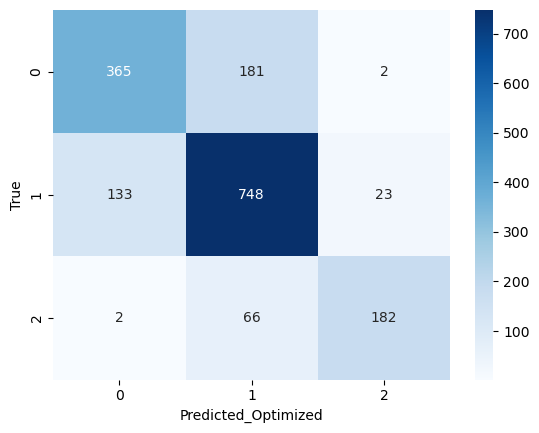

In [ ]:
cm = confusion_matrix(y_test, y_pred_clf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted_Optimized")
plt.ylabel("True")
plt.show()